In [2]:
import pandas as pd
%config IPCompleter.greedy = True
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# MNIST Теория

In [2]:
from sklearn.datasets import fetch_openml

In [3]:
mnist = fetch_openml('mnist_784')

In [4]:
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',
  'pixel51',
  '

In [5]:
X = mnist.data

In [6]:
X.shape

(70000, 784)

In [7]:
y = mnist.target.astype(int)

In [8]:
y.shape

(70000,)

In [9]:
X[20000]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   9.,  19.,  29.,
       216., 254., 254., 167.,   9.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

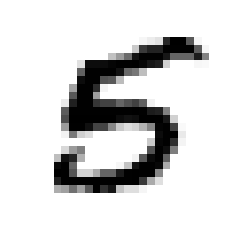

In [10]:
some_digit = X[20000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off");

In [11]:
y[20000]

5

In [12]:
import numpy as np

In [1]:
# Where to save the figures
import os
def save_fig(fig_id, tight_layout=True):
    path = os.path.join(fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [3]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [4]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

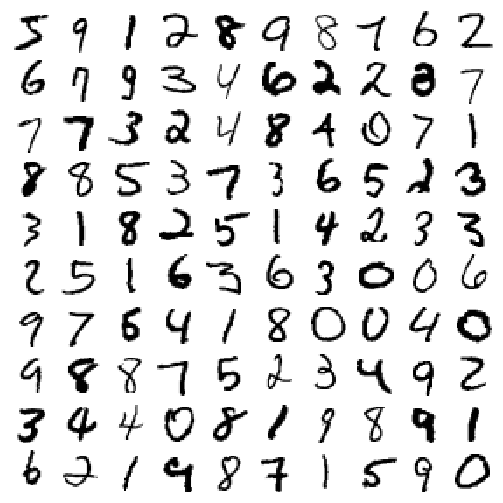

In [16]:
plt.figure(figsize=(9,9))
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]
plot_digits(example_images, images_per_row=10)
save_fig('graphs\[3]random_digits')
plt.show()

In [17]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [18]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

## Двоичный классификатор

In [19]:
y_train_5 = (y_train== 5)

In [20]:
y_train_5

array([False, False, False, ..., False, False, False])

In [21]:
y_test_5 = (y_test==5)

In [22]:
from sklearn.linear_model import SGDClassifier

In [23]:
sgd_clf = SGDClassifier(random_state=42)

In [24]:
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [25]:
sgd_clf.predict([some_digit])

array([ True])

In [26]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.9689 , 0.95885, 0.9629 ])

In [27]:
from sklearn.base import BaseEstimator

In [28]:
class Never5Classifier(BaseEstimator):
    def fit(self, X, y):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [29]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.90855, 0.91125, 0.90915])

#### Матрица неточностей

In [30]:
from sklearn.model_selection import cross_val_predict

In [31]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
'''
TN | FP
-------
FN | TP

Первая строка учитывает количество не пятерок. То есть 54579 цифр по факту не явлЯются пятерками.
53773 реально классифицированы как не 5 и ими не являются.
806 были ошибочно классифицированы как 5.

Вторая строка учитывает изображения пятерок. То есть их 5421.
1465 были ошибочно классифицированы как не 5. 3956 были классицированы как 5ки и ими являются.
'''

confusion_matrix(y_train_5, y_train_pred)

array([[53723,   856],
       [ 1331,  4090]], dtype=int64)

In [34]:
53773+806

54579

In [35]:
1465 + 3956

5421

In [36]:
confusion_matrix(y_train_5, y_train_pred)[0][0]

53723

In [37]:
y_train_5_perfect = y_train_5

In [38]:
'''
Безупречная матрица, идеальный классификатор
'''
confusion_matrix(y_train_5, y_train_5_perfect)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

###### Метрики

In [39]:
TP = confusion_matrix(y_train_5, y_train_pred)[1][1]
TN = confusion_matrix(y_train_5, y_train_pred)[0][0]
FP = confusion_matrix(y_train_5, y_train_pred)[0][1]
FN = confusion_matrix(y_train_5, y_train_pred)[1][0]

In [40]:
# точность
precision = TP / (TP + FP)
precision
# заявление, что изображение представляет пятерку, корректно только в 83% случаев

0.8269308532147189

In [41]:
# полнота
# true positive rate
# коэф положительных образцов, правильно обнаруженным классификатором
recall = TP / (TP + FN)
recall
# то есть, обнаруживает 75% всех пятерок

0.7544733444014019

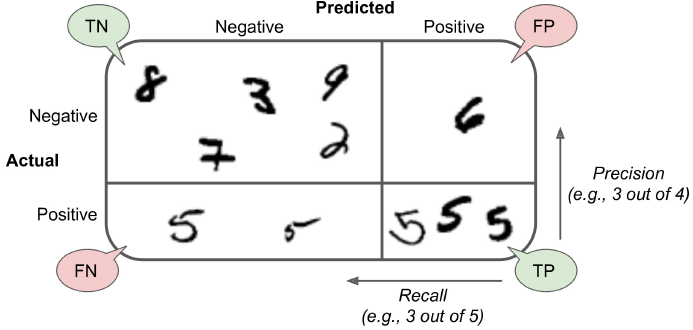

In [42]:
# F1 = (TP / (TP + ((FN + FP) / 2)))
F1 = 2 * (precision * recall / (precision + recall))
F1

0.7890421529854345

In [43]:
from sklearn.metrics import f1_score, roc_auc_score, precision_score, recall_score

In [44]:
f1_score(y_train_5, y_train_pred)

0.7890421529854345

In [45]:
roc_auc_score(y_train_5, y_train_pred)

0.8693948282680529

In [46]:
from sklearn.metrics import roc_curve


y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")
if y_scores.ndim == 2:
    y_scores = y_scores[:, 1]
    
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

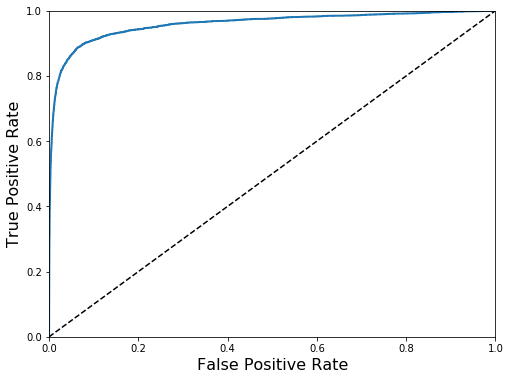

In [47]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [48]:
roc_auc_score(y_train_5, y_scores)

0.9590385642768824

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
rfc = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(rfc, X_train, y_train_5, cv=3, method='predict_proba')

C:\Program Files (x86)\Soft data analyst\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Program Files (x86)\Soft data analyst\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Program Files (x86)\Soft data analyst\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [51]:
y_probas_forest

array([[1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       ...,
       [1. , 0. ],
       [0.9, 0.1],
       [1. , 0. ]])

In [52]:
y_probas_forest[:, 1]

array([0. , 0. , 0. , ..., 0. , 0.1, 0. ])

In [53]:
y_scores_forest = y_probas_forest[:, 1]

In [54]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

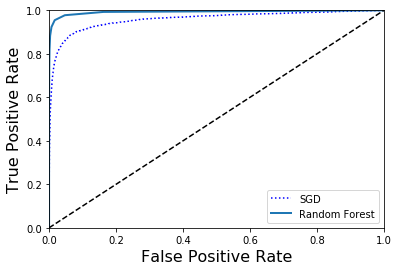

In [55]:
plt.plot(fpr, tpr, 'b:', label='SGD')
plot_roc_curve(fpr_forest, tpr_forest, 'Random Forest')
plt.legend(loc='lower right')
plt.show()

In [56]:
roc_auc_score(y_train_5, y_scores_forest)

0.9926357076353893

In [57]:
y_train_pred_forest = cross_val_predict(rfc, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

C:\Program Files (x86)\Soft data analyst\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Program Files (x86)\Soft data analyst\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Program Files (x86)\Soft data analyst\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9834107498341075

In [58]:
recall_score(y_train_5, y_train_pred_forest)

0.8201438848920863

## Многоклассовая классификация

In [59]:
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [60]:
sgd_clf.predict([some_digit])

array([5])

In [61]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-17507.31071861, -40421.68219872, -28417.39254461,
        -16277.76338424,  -8611.81156835,   5908.09419966,
        -12521.07352019, -44496.64491667,  -5172.21084677,
        -22576.50898782]])

In [62]:
np.argmax(some_digit_scores)

5

In [63]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [64]:
sgd_clf.classes_[5]

5

In [65]:
# One vs One Class
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5, tol=-np.infty, random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

array([5])

In [66]:
#происходит попарное сравнение и обучение 45 моделей
len(ovo_clf.estimators_)

45

In [67]:
ovo_clf.estimators_

(SGDClassifier(alpha=0.0001, average=False, class_weight=None,
               early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
               l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
               n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
               random_state=42, shuffle=True, tol=-inf, validation_fraction=0.1,
               verbose=0, warm_start=False),
 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
               early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
               l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
               n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
               random_state=42, shuffle=True, tol=-inf, validation_fraction=0.1,
               verbose=0, warm_start=False),
 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
               early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       

In [68]:
rfc.fit(X_train, y_train)
rfc.predict([some_digit])

C:\Program Files (x86)\Soft data analyst\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([5])

In [69]:
rfc.predict_proba([some_digit])
#вероятности в процентах

array([[0. , 0. , 0. , 0. , 0. , 0.9, 0. , 0. , 0. , 0.1]])

###### Оценка классификаторов

In [70]:
cross_val_score(sgd_clf, X_train, y_train, cv=3)

array([0.87727455, 0.88644432, 0.87368105])

In [71]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train.astype(np.float64))

In [72]:
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3)

C:\Program Files (x86)\Soft data analyst\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Program Files (x86)\Soft data analyst\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Program Files (x86)\Soft data analyst\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.90776845, 0.90684534, 0.90298545])

In [73]:
cross_val_score(rfc, X_train, y_train, cv=3, n_jobs=-1)

array([0.9405119 , 0.94044702, 0.94049107])

##### Анализ ошибок

In [75]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3, n_jobs=-1)

In [76]:
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5628,    0,   15,    9,   10,   52,   32,    6,  169,    2],
       [   1, 6422,   44,   25,    4,   46,    5,    8,  172,   15],
       [  27,   30, 5283,   96,   74,   31,   85,   40,  281,   11],
       [  26,   21,  126, 5295,    1,  235,   24,   47,  287,   69],
       [  13,   17,   44,   12, 5270,    9,   38,   19,  230,  190],
       [  31,   22,   35,  173,   51, 4568,   86,   18,  365,   72],
       [  30,   20,   49,    3,   38,  102, 5570,    8,   98,    0],
       [  19,   16,   57,   30,   52,   14,    5, 5736,  105,  231],
       [  19,   68,   46,  101,    3,  135,   35,   10, 5382,   52],
       [  24,   26,   28,   62,  129,   45,    1,  180,  256, 5198]],
      dtype=int64)

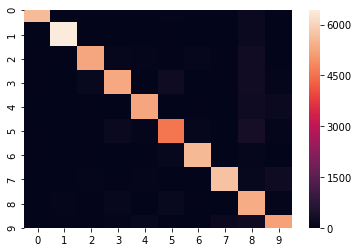

In [78]:
import seaborn as sns
sns.heatmap(conf_mx)

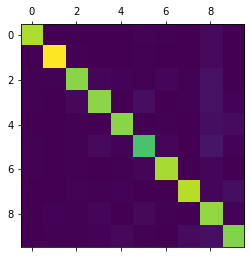

In [79]:
plt.matshow(conf_mx)

In [80]:
y_train_pred

array([6, 2, 3, ..., 4, 8, 6])

In [81]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

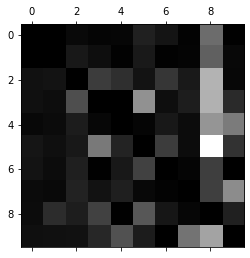

In [82]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

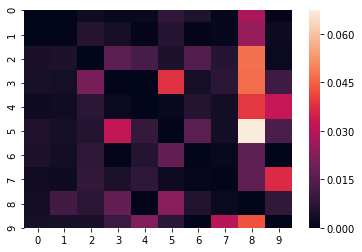

In [83]:
sns.heatmap(norm_conf_mx)

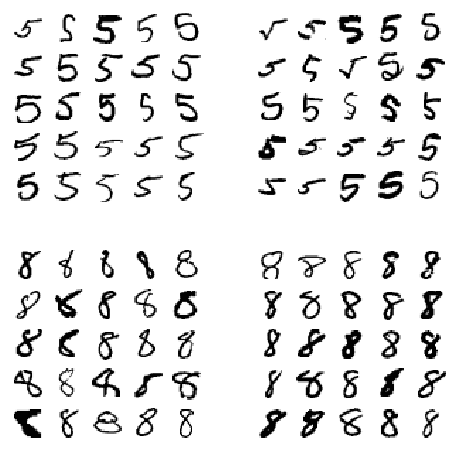

In [84]:
cl_a, cl_b = 5, 8
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

## Многозначная классификация

Главную цель многозначной классификации можно объяснить на примере. Например, есть набор фотографий, на может находиться 3 человека: Андрей, Борис и Влад, как вместе, так и раздельно. Допустим, если на фотографии будут Андрей и Влад, должно выдать [1, 0, 1] (Андрей - да, Борис - нет, Влад - да)

In [85]:
from sklearn.neighbors import KNeighborsClassifier

In [86]:
y_train_large = (y_train >=7 )
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

In [87]:
i=0
while i < 3:
    
    print(y_train_large[i], '|', y_train_odd[i])
    i +=1

False | False
False | False
False | True


In [88]:
np.c_[y_train_large, y_train_odd] # np.c_ производит конкатенацию значений

array([[False, False],
       [False, False],
       [False,  True],
       ...,
       [False, False],
       [ True, False],
       [False, False]])

In [89]:
knc = KNeighborsClassifier()
knc.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [90]:
knc.predict([some_digit]) # 5

array([[False,  True]])

То есть, число пять у нас не является большим ( <7 ) и является нечетным ( % 2 == 1 )

## Многовыходовая классификация

In [91]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [92]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

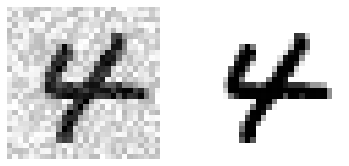

In [93]:
some_index = 5500
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
plt.show()

In [94]:
knc.fit(X_train_mod, y_train_mod)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Saving figure cleaned_digit_example_plot


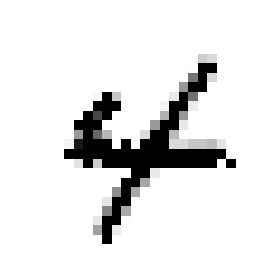

In [97]:
clean_digit = knc.predict([X_test_mod[some_index]])
plot_digit(clean_digit)
save_fig("cleaned_digit_example_plot")